<a href="https://colab.research.google.com/github/ryannovianno9/Garment-Productivity-Classification/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn==1.0.2

ERROR: Operation cancelled by user


# Data Collection and Data Understanding

## Data Collection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset link: https://drive.google.com/drive/folders/13M0Z9Zzz_NJGrYrUD4qWVRxim2f_OTZ8

## Problem

Imagine you are a Data Scientist at a company engaged in the garment industry. You are asked by the CEO of the company to predict the effectiveness of labor.Because most of the processes in his factory are still done manually (human labor has a large portion compared to machines), it is important for him to know how effective and efficient the performance of his workers so that he can make certain interventions if the effectiveness of their performance starts to fall and provide incentives if their performance is good and stable.

## Import Library

In [1]:
!pip install yellowbrick
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

## Data Understanding

In [2]:
df = pd.read_csv('/content/drive/MyDrive/garments_worker_productivity.csv')
df.shape

(1197, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
dict(df.dtypes)

{'date': dtype('O'),
 'quarter': dtype('O'),
 'department': dtype('O'),
 'day': dtype('O'),
 'team': dtype('int64'),
 'targeted_productivity': dtype('float64'),
 'smv': dtype('float64'),
 'wip': dtype('float64'),
 'over_time': dtype('int64'),
 'incentive': dtype('int64'),
 'idle_time': dtype('float64'),
 'idle_men': dtype('int64'),
 'no_of_style_change': dtype('int64'),
 'no_of_workers': dtype('float64'),
 'actual_productivity': dtype('float64')}

In [6]:
df.isna().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [7]:
df.isna()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1193,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1194,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1195,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

date: ['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']
quarter: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
department: ['sweing' 'finishing ' 'finishing']
day: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
team: [ 8  1 11 12  6  7  2  3  9 10  5  4]
targeted_productivity: [0.8  0.75 0.7  0.65 0.6  0.35 0.5  0.07 0.4 ]
s

# Data Cleaning

<Axes: >

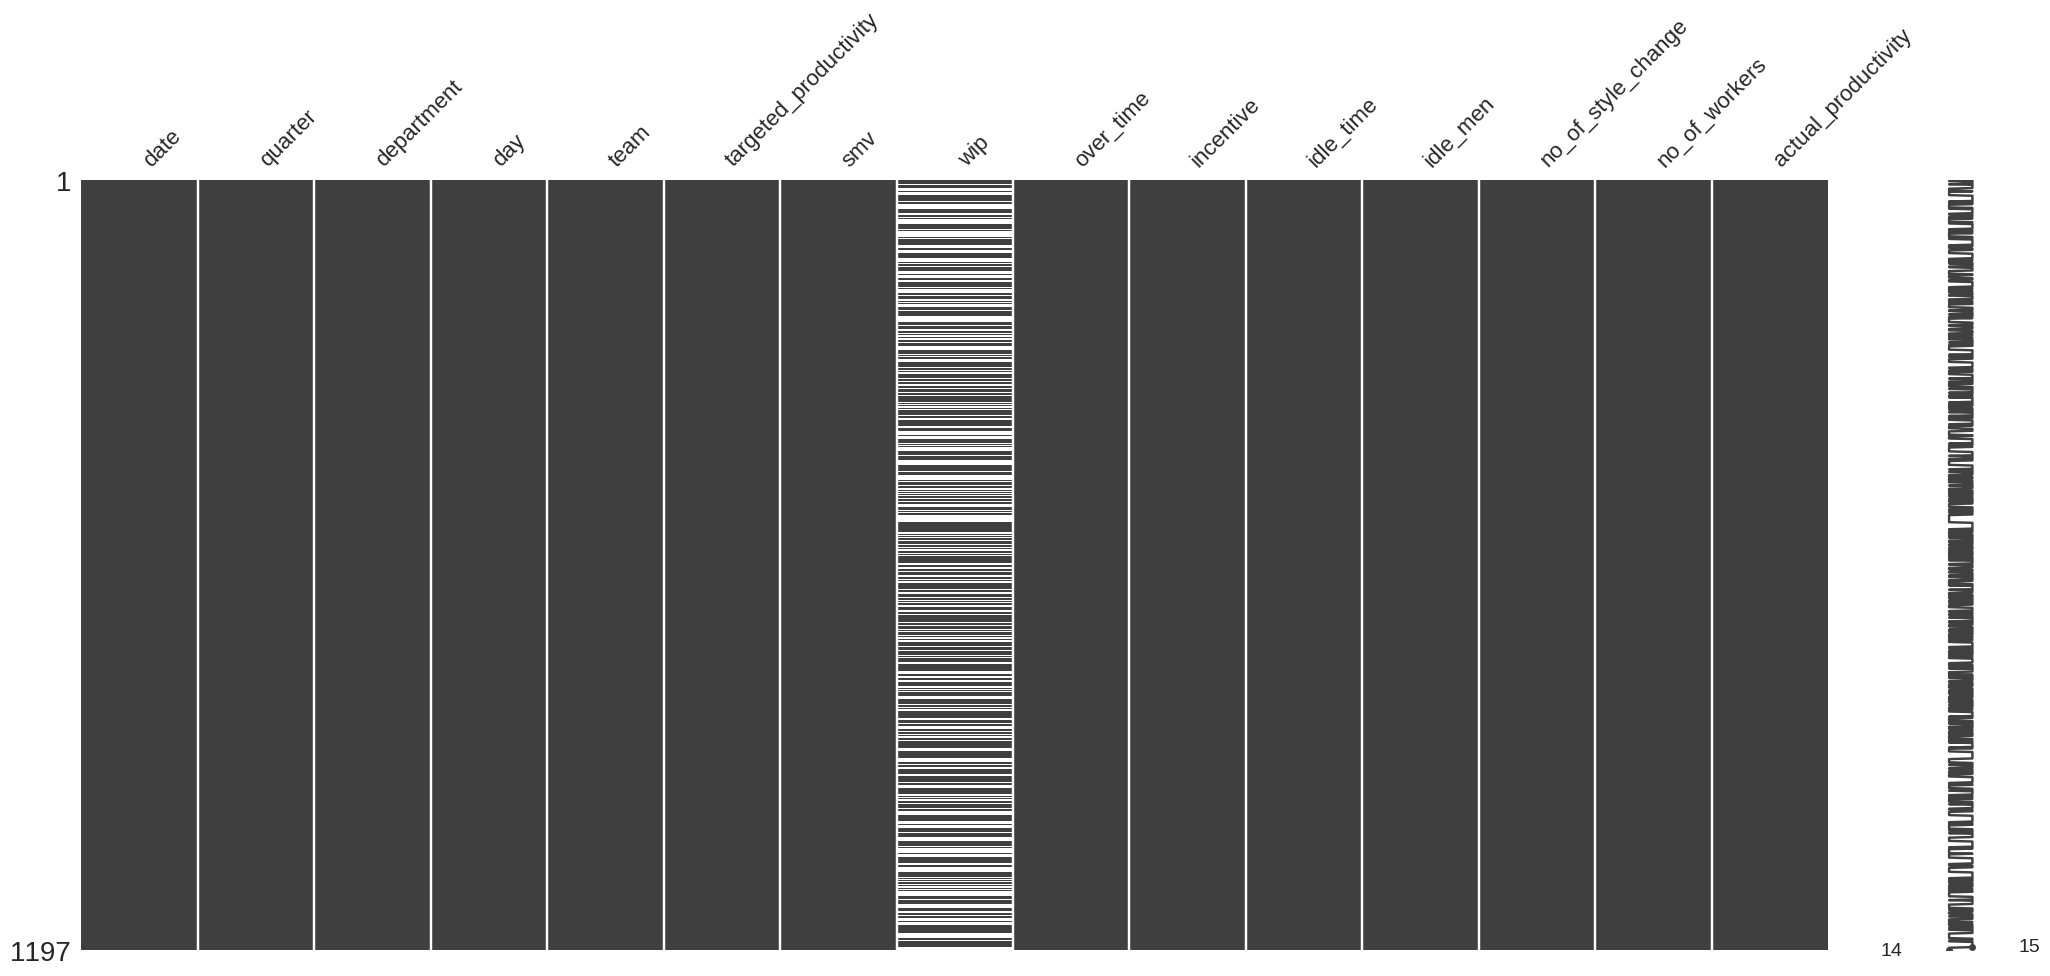

In [10]:
import missingno as msno

msno.matrix(df)  # just to visualize. no missing value.

In [11]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

,0
date,0.000000
quarter,0.000000
department,0.000000
day,0.000000
team,0.000000
targeted_productivity,0.000000
smv,0.000000
wip,42.272348
over_time,0.000000
incentive,0.000000


In [12]:
df['wip'] = df['wip'].fillna(0)
df['wip']

,wip
0,1108.0
1,0.0
2,968.0
3,968.0
4,1170.0
...,...
1192,0.0
1193,0.0
1194,0.0
1195,0.0


In [13]:
df['date'] = pd.to_datetime(df['date'])
df['department'] = df['department'].replace('sweing','sewing')
df['department'] = df['department'].replace('finishing ', 'finishing')

df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [14]:
df['day_of_month'] = df['date'].dt.day
df['day'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head(20)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month,year
0,2015-01-01,Quarter1,sewing,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1,2015
1,2015-01-01,Quarter1,finishing,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,1,2015
2,2015-01-01,Quarter1,sewing,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2015
3,2015-01-01,Quarter1,sewing,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2015
4,2015-01-01,Quarter1,sewing,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1,2015
5,2015-01-01,Quarter1,sewing,3,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,1,1,2015
6,2015-01-01,Quarter1,finishing,3,2,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167,1,1,2015
7,2015-01-01,Quarter1,sewing,3,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683,1,1,2015
8,2015-01-01,Quarter1,sewing,3,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098,1,1,2015
9,2015-01-01,Quarter1,sewing,3,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428,1,1,2015


In [15]:
num_cols = [i for i in df.columns if df[i].dtypes != 'object' and i not in ['no_of_style_change','date','team','day','month','year']]
cat_cols = [i for i in df.columns if df[i].dtypes == 'object' or i in ['no_of_style_change','team','day','month']]

print(num_cols)
print(cat_cols)

['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity', 'day_of_month']
['quarter', 'department', 'day', 'team', 'no_of_style_change', 'month']


# EDA

In [16]:
df.describe()

,date,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month,year
count,1197,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.0
mean,2015-02-04 10:56:50.526315776,2.812865,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091,13.533835,1.724311,2015.0
min,2015-01-01 00:00:00,0.000000,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,1.000000,1.000000,2015.0
25%,2015-01-18 00:00:00,1.000000,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,6.000000,1.000000,2015.0
50%,2015-02-03 00:00:00,2.000000,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,12.000000,2.000000,2015.0
75%,2015-02-23 00:00:00,5.000000,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,21.000000,2.000000,2015.0
max,2015-03-11 00:00:00,6.000000,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,31.000000,3.000000,2015.0
std,NaN,2.112252,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488,8.623967,0.744558,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   int32         
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

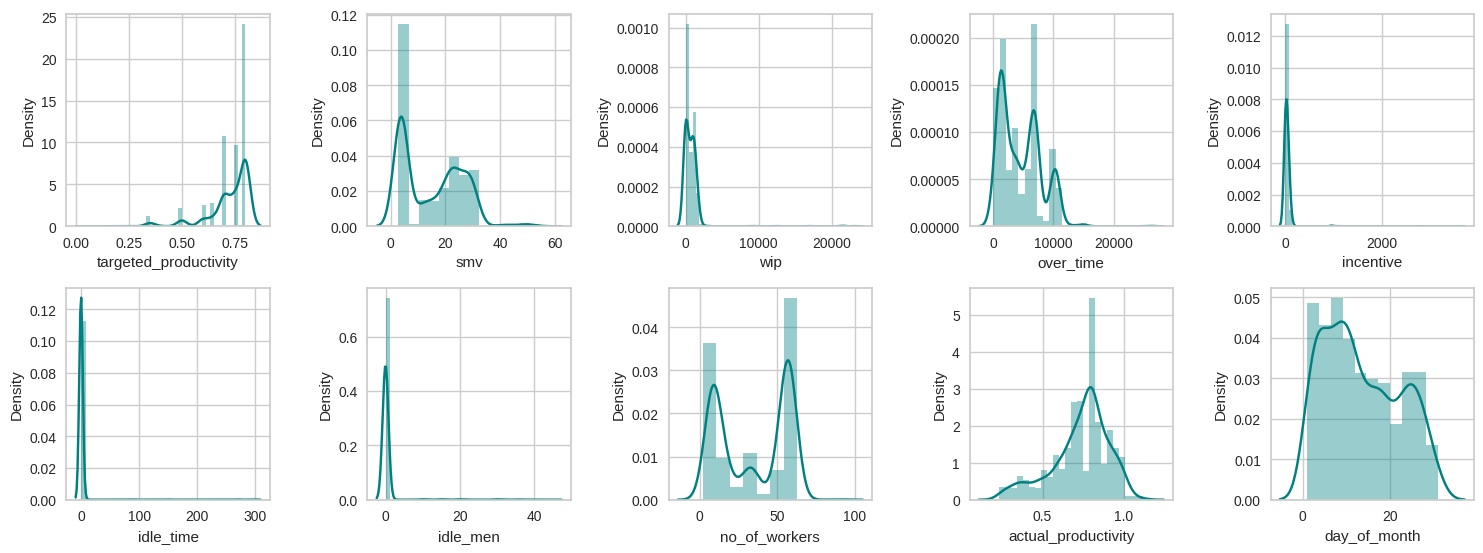

In [18]:
plt.figure(figsize=(15,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[num_cols[i]], color='teal')
    plt.tight_layout()

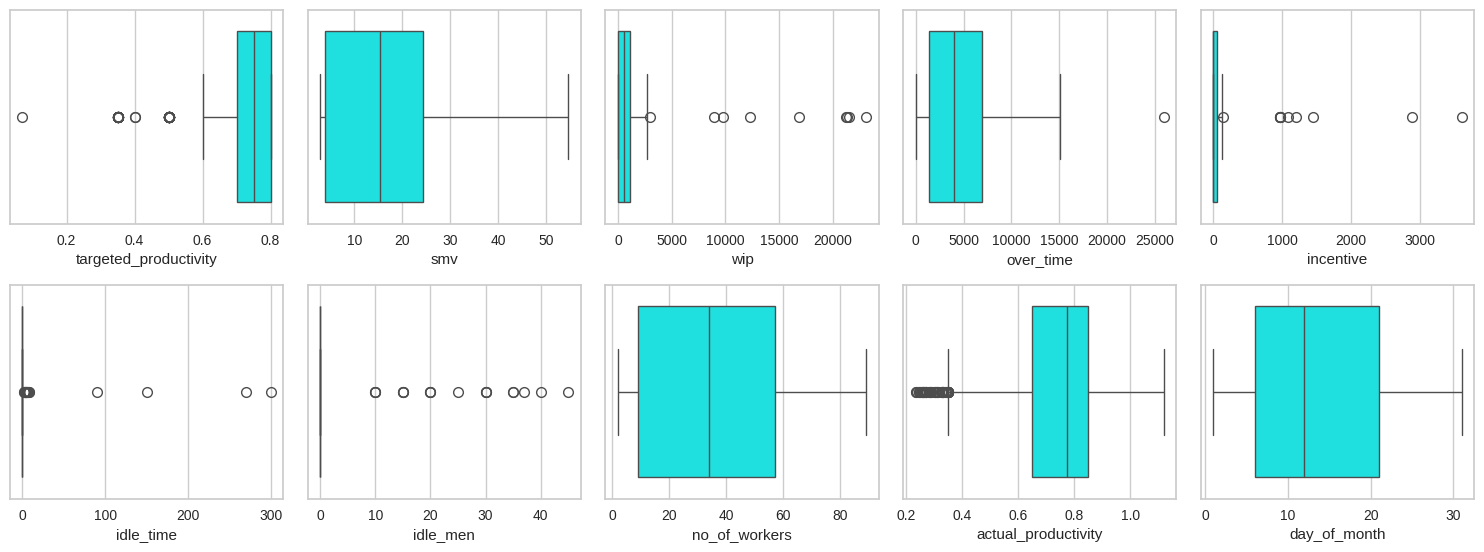

In [19]:
plt.figure(figsize=(15,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=df[num_cols[i]], color='cyan', orient='v')
    plt.tight_layout()

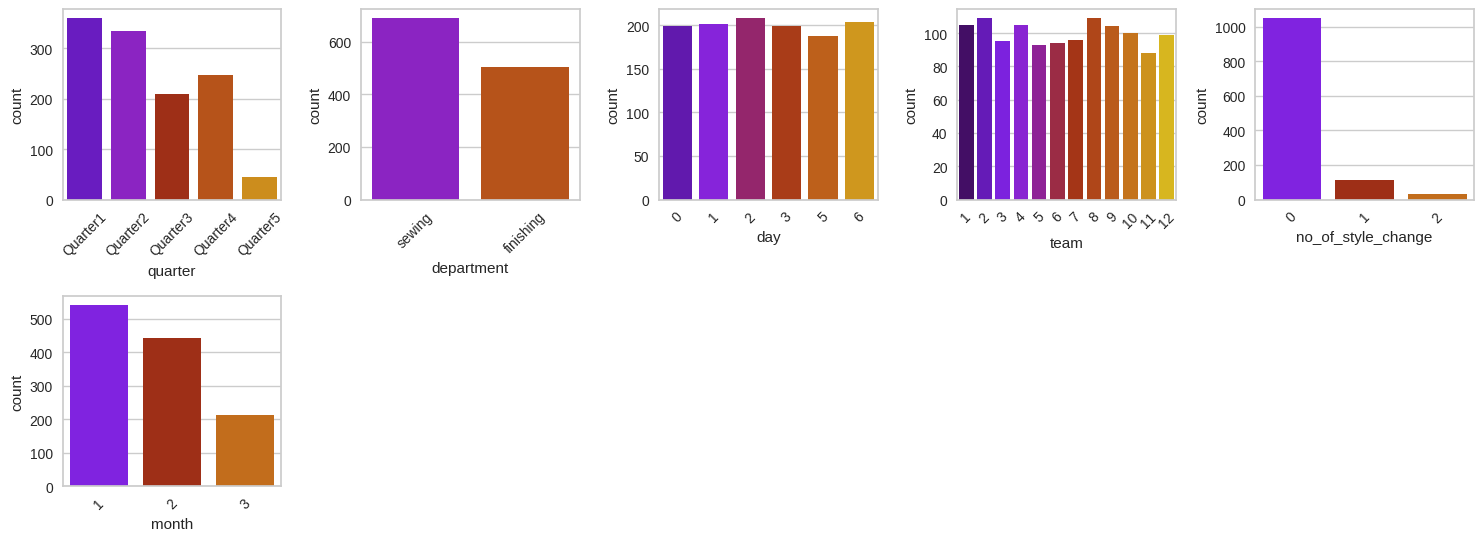

In [20]:
plt.figure(figsize=(15,8))
for i in range(0, len(cat_cols)):
    plt.subplot(3, 5, i+1)
    sns.countplot(x=df[cat_cols[i]], data=df, palette='gnuplot')
    plt.xticks(rotation=45)
    plt.tight_layout()

<Axes: >

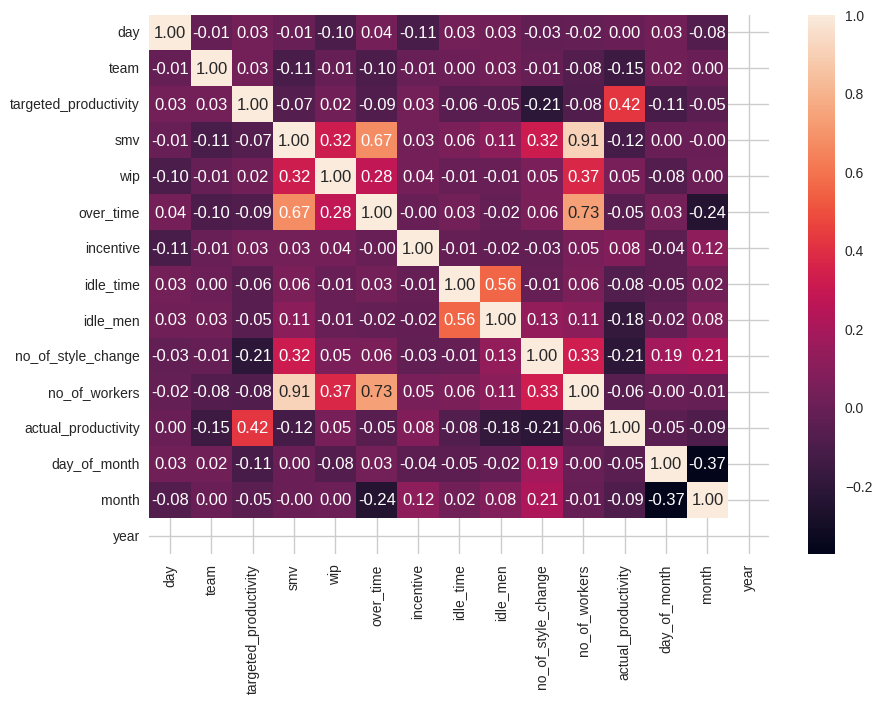

In [21]:
# Correlation
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')

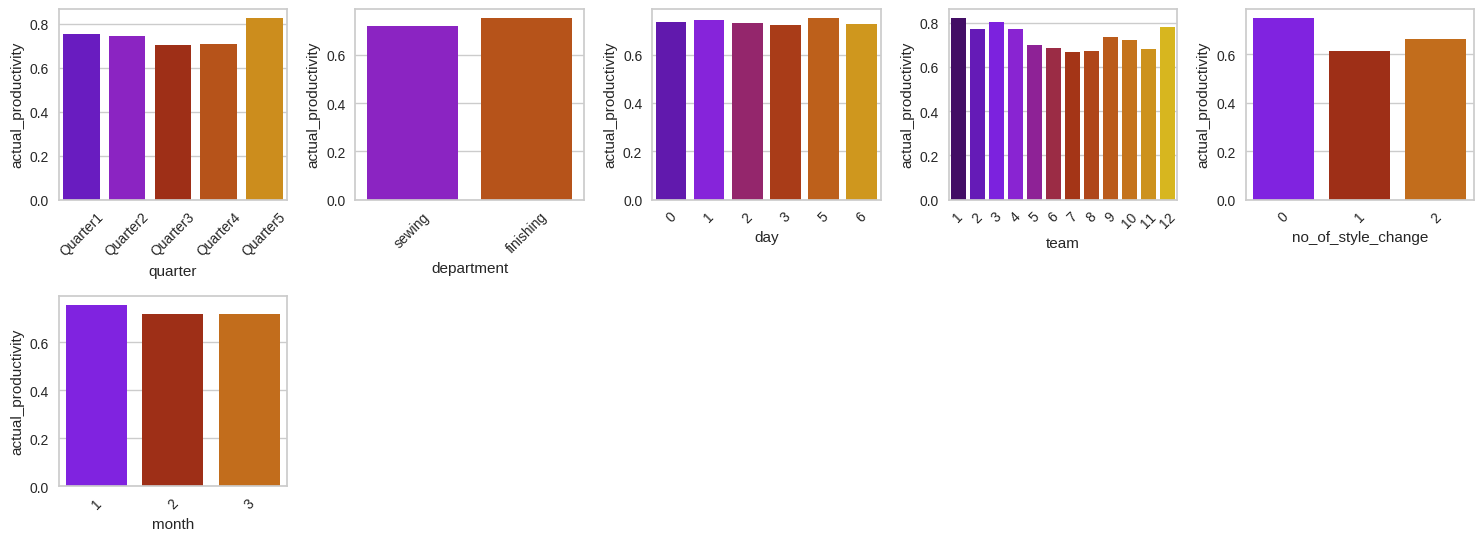

In [22]:
plt.figure(figsize=(15,8))
for i in range(0, len(cat_cols)):
    plt.subplot(3, 5, i+1)
    sns.barplot(x=cat_cols[i], y='actual_productivity', data=df,palette='gnuplot',ci=None)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

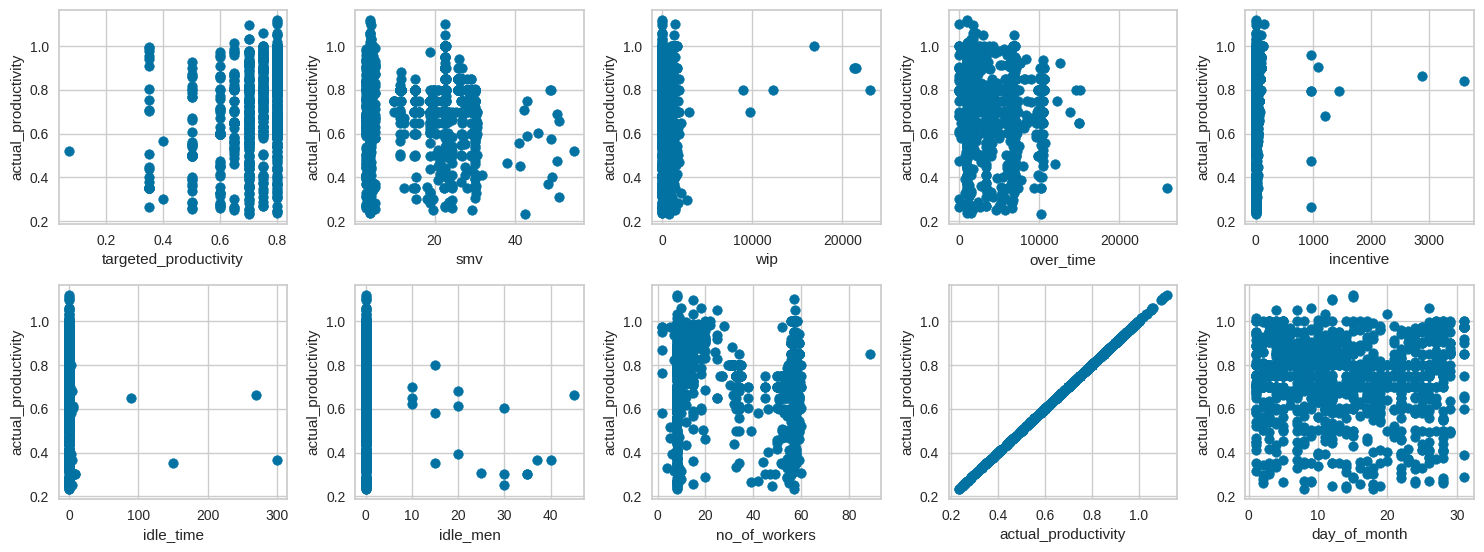

In [23]:
plt.figure(figsize=(15,8))
for i in range(0, len(num_cols)):
    plt.subplot(3, 5, i+1)
    plt.scatter(df[num_cols[i]], df['actual_productivity'])
    plt.xlabel(num_cols[i])
    plt.ylabel('actual_productivity')
    plt.tight_layout()

plt.show()

# Modelling and Evaluation

In [24]:
df2 = df.copy()

In [25]:
df2.drop(columns=['date'], inplace=True)

In [26]:
le= LabelEncoder()
df2["department"] = le.fit_transform(df2["department"])
df2["quarter"] = le.fit_transform(df2["quarter"])

In [27]:
df2.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,day_of_month,month,year
0,0,1,3,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,1,2015
1,0,0,3,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,1,2015
2,0,1,3,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2015
3,0,1,3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,1,2015
4,0,1,3,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,1,2015


In [28]:
X = df2.drop(columns=['actual_productivity'])
y = df2['actual_productivity']

In [29]:
from feature_engine.outliers import Winsorizer

# Buat Winsorizer
windsoriser = Winsorizer(capping_method='iqr', # pilih 'iqr' untuk batas aturan IQR atau 'gaussian' untuk mean dan std
                          tail='both',
                          fold=1.5,
                          variables=['incentive', 'over_time'])

windsoriser.fit(X)

# Transformasikan data
X = windsoriser.transform(X)

In [30]:
#Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.15168784,  0.85572897,  0.08863183, ..., -1.45397973,
        -0.97321293,  0.        ],
       [-1.15168784, -1.1685943 ,  0.08863183, ..., -1.45397973,
        -0.97321293,  0.        ],
       [-1.15168784,  0.85572897,  0.08863183, ..., -1.45397973,
        -0.97321293,  0.        ],
       ...,
       [-0.32866077, -1.1685943 , -0.3849945 , ..., -0.29393591,
         1.71406706,  0.        ],
       [-0.32866077, -1.1685943 , -0.3849945 , ..., -0.29393591,
         1.71406706,  0.        ],
       [-0.32866077, -1.1685943 , -0.3849945 , ..., -0.29393591,
         1.71406706,  0.        ]])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results1 = []
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Support Vector Regressor', SVR()),
    ('K-Nearest Neighbors Regressor', KNeighborsRegressor()),
    ('XGBoost Regressor', XGBRegressor(random_state=42))
]

best_model = None
best_r2 = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # Calculate R2
    r2 = r2_score(y_test, y_pred)

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #calculate MAE
    mae = mean_absolute_error(y_test, y_pred)

    results1.append([name, r2, mae])

    #print the performance metrics
    print("Model", name)
    print("R2: ", r2)
    print("MAE:", mae)
    print()

    if r2 > best_r2:
      best_r2 = r2
      best_model = pipeline

print("Best Model: ", best_model,"\n")

df_results1 = pd.DataFrame(results1, columns=['Model', 'R2','Mean Absolute Error'])
print(df_results1)

Model Linear Regression
R2:  0.462815832221078
MAE: 0.09432740823658282

Model Random Forest Regressor
R2:  0.3262767700294854
MAE: 0.06836473862958328

Model Decision Tree Regressor
R2:  0.5579116655624816
MAE: 0.08281315708333334

Model Support Vector Regressor
R2:  0.240801599302779
MAE: 0.09086980458251051

Model K-Nearest Neighbors Regressor
R2:  0.41028141388636286
MAE: 0.09148467146999999

Model XGBoost Regressor
R2:  0.33163747481952655
MAE: 0.07468399511350142

Best Model:  Pipeline(steps=[('model', DecisionTreeRegressor(random_state=42))]) 

                           Model        R2  Mean Absolute Error
0              Linear Regression  0.462816             0.094327
1        Random Forest Regressor  0.326277             0.068365
2        Decision Tree Regressor  0.557912             0.082813
3       Support Vector Regressor  0.240802             0.090870
4  K-Nearest Neighbors Regressor  0.410281             0.091485
5              XGBoost Regressor  0.331637             0.0

## Hyperparameter Tuning

In [33]:
# def hyperparameter_tuning(X, y, models):
#     # Define dictionary to store results
#     results = {}

#     # Perform hyperparameter tuning for each model
#     for model_name, model in models.items():
#     # Define parameter grid for hyperparameter tuning
#         param_grid = {}
#         if model_name == 'Linear Regression':
#           param_grid = {'fit_intercept': [True, False]}
#         elif model_name == 'Random Forest Regressor':
#           param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
#         elif model_name == 'Decision Tree Regressor':
#           param_grid = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
#         elif model_name == 'Support Vector Regressor':
#           param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}
#         elif model_name == 'K-Nearest Neighbors Regressor':
#           param_grid = {'n_neighbors': [3, 5, 7, 9]}
#         elif model_name == 'XGBoost Regressor':
#           param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}



#         # Perform hyperparameter tuning using GridSearchCV
#         grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
#         grid_search.fit(X_train, y_train)

#         # Get best hyperparameters and evaluate on test set
#         best_params = grid_search.best_params_
#         best_model = grid_search.best_estimator_
#         y_pred = best_model.predict(X_test)
#         r2 = r2_score(y_test, y_pred)

#         # Store results in dictionary
#         results[model_name] = {'best_params': best_params, 'r2': r2}

#     return results

In [ ]:
# # Define models dictionary
# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest Regressor": RandomForestRegressor(),
#     "Decision Tree Regressor": DecisionTreeRegressor(),
#     "Support Vector Regressor": SVR(),
#     "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
#     "XGBoost Regressor": XGBRegressor()
# }

# # Example usage:
# results = hyperparameter_tuning(X_train, y_train, models)
# for model_name, result in results.items():
#     print("Model:", model_name)
#     print("Best hyperparameters:", result['best_params'])
#     print("r2:", result['r2'])
#     print()

In [ ]:
# results2 = []

# models = [
#     ('Linear Regression', LinearRegression(fit_intercept=True)),
#     ('Random Forest Regressor', RandomForestRegressor(max_depth=30, n_estimators=300)),
#     ('Decision Tree Regressor', DecisionTreeRegressor(max_depth=10, min_samples_split=10)),
#     ('Support Vector Regressor', SVR(C=1, gamma=0.1)),
#     ('K-Nearest Neighbors Regressor', KNeighborsRegressor(n_neighbors=5)),
#     ('XGBoost Regressor', XGBRegressor(learning_rate=0.01, n_estimators=300))
# ]

# best_model = None
# best_r2 = 0.0

# #Iterate over the models and evaluate their performance
# for name, model in models:
#     #create a pipeline for each model
#     pipeline = Pipeline([
#         ('model', model)
#     ])

#     # Calculate R2
#     r2 = r2_score(y_test, y_pred)

#     #fit the pipeline on the training data
#     pipeline.fit(X_train, y_train)

#     # make prediction on the test data
#     y_pred = pipeline.predict(X_test)

#      #calculate MSE
#     mse = mean_squared_error(y_test, y_pred)

#     #calculate RSME
#     rmse = np.sqrt(mse)

#     #calculate SMAPE
#     smape = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred))) * 100

#     results2.append([name, r2, rmse, smape])

#     #print the performance metrics
#     print("Model", name)
#     print("R2: ", r2)
#     print("MSE:", mse)
#     print("RMSE:", rmse)
#     print("SMAPE:", smape)
#     print()

#     if r2 > best_r2:
#       best_r2 = r2
#       best_model = pipeline



# # Retrieve the best model
# print("Best Model: ", best_model)

# df_results2 = pd.DataFrame(results2, columns=['Model', 'R2', 'Root Mean Squared Error', 'Symmetric Mean Absolute Percentage Error'])
# print(df_results2)

## Visualization

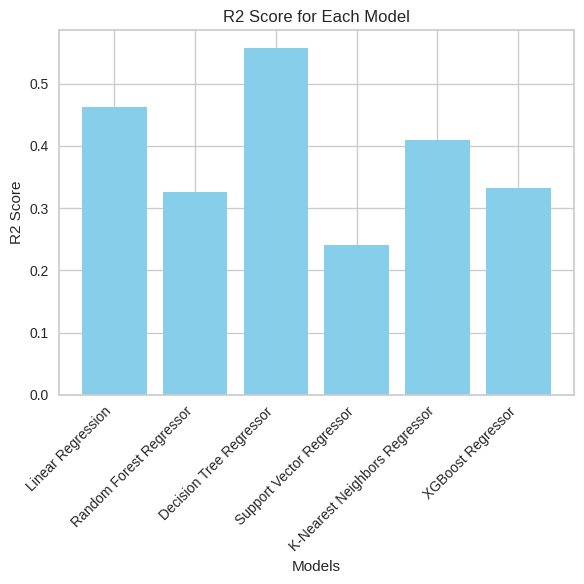

In [49]:
import matplotlib.pyplot as plt
import numpy as np

models = df_results1['Model']
r2_scores = df_results1['R2']

plt.figure(figsize=(6, 6))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel("Models")
plt.ylabel("R2 Score")
plt.title("R2 Score for Each Model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

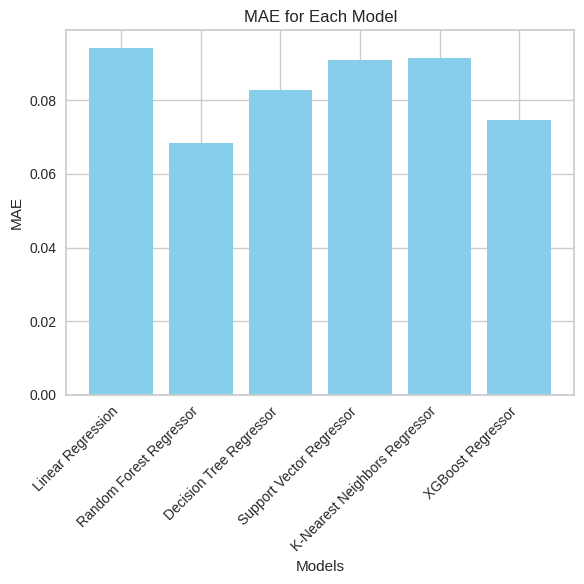

In [51]:
import matplotlib.pyplot as plt
import numpy as np

models = df_results1['Model']
mae = df_results1['Mean Absolute Error']

plt.figure(figsize=(6, 6))
plt.bar(models, mae, color='skyblue')
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("MAE for Each Model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

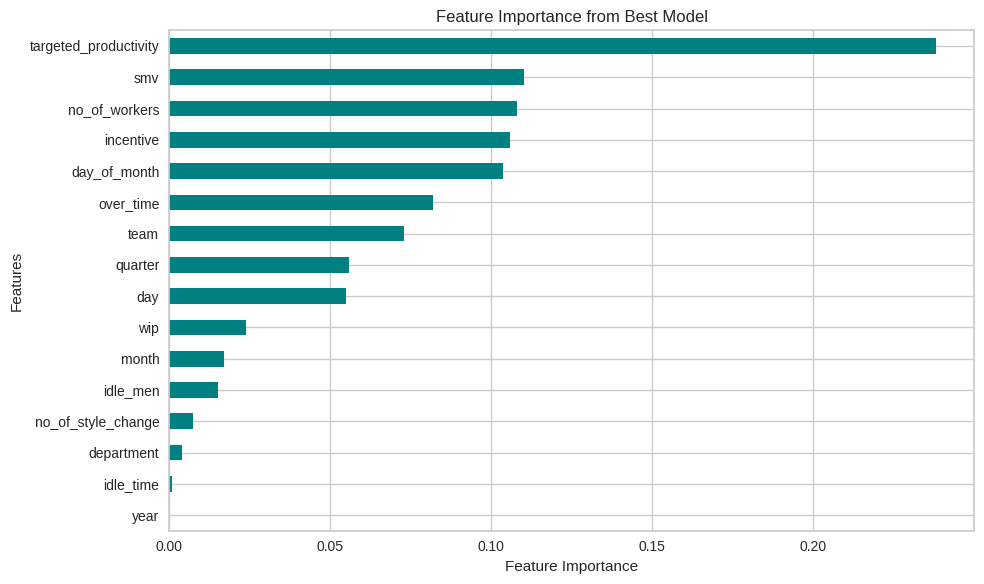

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = best_model.named_steps['model'].feature_importances_

feature_names = df2.drop(columns=['actual_productivity']).columns
importance_series = pd.Series(feature_importances, index=feature_names)

sorted_importance = importance_series.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_importance.plot(kind='barh', color='teal')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Best Model")
plt.tight_layout()
plt.show()

## Save Model

In [ ]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
with open('best_model.pkl', 'rb') as file:
    saved_model = pickle.load(file)

new_data = pd.read_csv('/content/drive/MyDrive/garments_new.csv')
new_data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,500.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/2/2015,Quarter1,sewing,Friday,8,0.85,27.00,1120.0,7200,110,0.0,0,1,60.0,0.950000
6,1/2/2015,Quarter1,finishing,Friday,2,0.78,4.10,600.0,950,0,0.0,0,0,9.0,0.875000
7,1/2/2015,Quarter1,sewing,Friday,10,0.83,12.00,970.0,3700,55,0.0,0,0,32.0,0.820000
8,1/2/2015,Quarter1,sewing,Friday,14,0.79,11.50,965.0,3600,45,0.0,0,0,31.5,0.810000
9,1/2/2015,Quarter1,sewing,Friday,7,0.81,26.00,1165.0,1900,48,0.0,0,0,57.0,0.805000


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   20 non-null     object 
 1   quarter                20 non-null     object 
 2   department             20 non-null     object 
 3   day                    20 non-null     object 
 4   team                   20 non-null     int64  
 5   targeted_productivity  20 non-null     float64
 6   smv                    20 non-null     float64
 7   wip                    20 non-null     float64
 8   over_time              20 non-null     int64  
 9   incentive              20 non-null     int64  
 10  idle_time              20 non-null     float64
 11  idle_men               20 non-null     int64  
 12  no_of_style_change     20 non-null     int64  
 13  no_of_workers          20 non-null     float64
 14  actual_productivity    20 non-null     float64
dtypes: float

In [ ]:
new_data.drop(columns=['date','wip'], inplace=True)

In [ ]:
new_data['productivity_category'] = new_data['actual_productivity'].apply(categorize_productivity)


In [ ]:
le= LabelEncoder()
new_data["department"] = le.fit_transform(new_data["department"])
new_data["quarter"] = le.fit_transform(new_data["quarter"])
new_data["day"] = le.fit_transform(new_data["day"])
new_data["productivity_category"] = le.fit_transform(new_data["productivity_category"])

In [ ]:
new_data

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity_category
0,0,1,3,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0
1,0,0,3,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,0
2,0,1,3,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
3,0,1,3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0
4,0,1,3,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0
5,0,1,0,8,0.85,27.00,7200,110,0.0,0,1,60.0,0.950000,0
6,0,0,0,2,0.78,4.10,950,0,0.0,0,0,9.0,0.875000,0
7,0,1,0,10,0.83,12.00,3700,55,0.0,0,0,32.0,0.820000,0
8,0,1,0,14,0.79,11.50,3600,45,0.0,0,0,31.5,0.810000,0
9,0,1,0,7,0.81,26.00,1900,48,0.0,0,0,57.0,0.805000,0


In [ ]:
X_new = new_data.drop(columns=['actual_productivity','productivity_category'])
y_new = new_data['actual_productivity']

In [ ]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

In [ ]:
predictions = saved_model.predict(X_new)
print(predictions)

[2 1 2 2 2 0 1 2 1 2 0 1 2 1 2 0 1 2 2 2]
